In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\may2\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

 ## Read the CSV and Perform Basic Data Cleaning    

In [6]:
df = pd.read_csv("Resources/Autism.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,...,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,...,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,...,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,...,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,...,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [15]:
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df.head()

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Score,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Used_App_Before_no,Used_App_Before_yes,Screening Type_17 and more,Language_arabic,Language_english,Language_farsi,Language_french,Language_mandarin,Language_portuguese,Language_russian,Language_spanish,Language_turkish,Language_urdu,User_friend,User_health care professional,User_others,User_parent,User_relative,User_self,User_teacher,Class_NO,Class_YES
0,6,0,0,0,0,0,0,0,0,0,0,27,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,10,1,1,1,1,1,1,1,1,1,1,21,10,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,12,1,1,0,1,1,0,0,1,0,0,18,5,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,16,1,0,0,0,1,1,1,1,1,1,49,7,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,20,1,1,1,0,0,0,0,1,0,0,18,4,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Select your features (columns)    

In [16]:
# Set features. This will also be used as your x values.
X = df.drop(columns=['Class_NO','Class_YES'])
y = df[['Class_NO','Class_YES']]
print(X.shape, y.shape)

(1117, 136) (1117, 2)


## Create a Train Test Split     
*Use koi_disposition for the y values*

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)
#X, y, random_state = 42

## Pre-processing     
*Scale the data using the MinMaxScaler and perform some feature selection*

In [21]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

#X
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#y
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

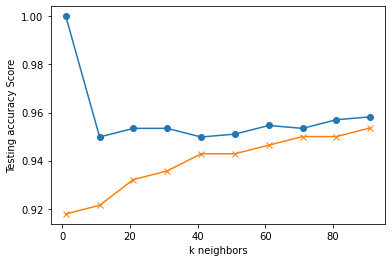

In [27]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 100, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train_scaled)
    test_score = knn.score(X_test_scaled, y_test_scaled)
    train_scores.append(train_score)
    test_scores.append(test_score)
    #print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 100, 10), train_scores, marker='o')
plt.plot(range(1, 100, 10), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [28]:
# Note that k: 21 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=21)
gs = knn.fit(X_train_scaled, y_train_scaled)
print('k=12 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_scaled))

k=12 Test Acc: 0.932


In [29]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.953405017921147
Testing Data Score: 0.9321428571428572


In [30]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {'leaf_size': [1, 2, 5, 10, 15, 30, 20], 'n_neighbors': [3, 5, 11, 13, 15, 31, 33, 21, 41, 51], 'p': [1],
             'algorithm': ['auto', 'ball_tree', 'brute', 'kd_tree'], 'p': [1, 2]}
grid = GridSearchCV(knn, param_grid, verbose=3)

In [31]:
# Train the model with GridSearch
grid.fit(X_train_scaled,y_train_scaled)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=1 .................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=1, score=0.893, total=   0.2s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=1 .................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=1, score=0.893, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=1 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=1, score=0.928, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=1 .................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=1, score=0.946, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=1 .................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=1, score=0.958, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=2 .................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=2, score=0.899, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=2 .................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=2, score=0.893, total=   0.3s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=2 .................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=2, score=0.934, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=3, p=2 .................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=3, p=2, score=0.946, total=   0.2s


[CV]  algorithm=auto, leaf_size=1, n_neighbors=31, p=2, score=0.929, total=   0.3s
[CV] algorithm=auto, leaf_size=1, n_neighbors=31, p=2 ................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=31, p=2, score=0.952, total=   0.4s
[CV] algorithm=auto, leaf_size=1, n_neighbors=31, p=2 ................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=31, p=2, score=0.958, total=   0.3s
[CV] algorithm=auto, leaf_size=1, n_neighbors=31, p=2 ................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=31, p=2, score=0.970, total=   0.4s
[CV] algorithm=auto, leaf_size=1, n_neighbors=33, p=1 ................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=33, p=1, score=0.935, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=33, p=1 ................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=33, p=1, score=0.946, total=   0.2s
[CV] algorithm=auto, leaf_size=1, n_neighbors=33, p=1 ................
[CV]  algorithm=auto, leaf_size=1, n_neighbors=33, p=1, score=0.964, total= 

[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, p=1, score=0.869, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, p=1 .................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, p=1, score=0.923, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, p=1 .................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, p=1, score=0.940, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, p=1 .................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, p=1, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, p=1 .................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, p=1, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, p=2 .................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, p=2, score=0.863, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n_neighbors=5, p=2 .................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=5, p=2, score=0.929, total=   0.2s


[CV]  algorithm=auto, leaf_size=2, n_neighbors=33, p=2, score=0.929, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n_neighbors=33, p=2 ................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=33, p=2, score=0.940, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n_neighbors=33, p=2 ................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=33, p=2, score=0.958, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n_neighbors=33, p=2 ................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=33, p=2, score=0.958, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n_neighbors=33, p=2 ................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=33, p=2, score=0.964, total=   0.2s
[CV] algorithm=auto, leaf_size=2, n_neighbors=21, p=1 ................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=21, p=1, score=0.935, total=   0.1s
[CV] algorithm=auto, leaf_size=2, n_neighbors=21, p=1 ................
[CV]  algorithm=auto, leaf_size=2, n_neighbors=21, p=1, score=0.935, total= 

[CV]  algorithm=auto, leaf_size=5, n_neighbors=5, p=2, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=11, p=1 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=11, p=1, score=0.893, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=11, p=1 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=11, p=1, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=11, p=1 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=11, p=1, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=11, p=1 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=11, p=1, score=0.964, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=11, p=1 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=11, p=1, score=0.964, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=11, p=2 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=11, p=2, score=0.881, total=  

[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=1, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=1 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=1, score=0.964, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, score=0.940, total=   0.2s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, score=0.929, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, score=0.958, total=   0.2s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=5, n_neighbors=21, p=2 ................
[CV]  algorithm=auto, leaf_size=5, n_neighbors=21, p=2, score=0.970, total= 

[CV]  algorithm=auto, leaf_size=10, n_neighbors=11, p=2, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=11, p=2 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=11, p=2, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=13, p=1 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=13, p=1, score=0.911, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=13, p=1 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=13, p=1, score=0.946, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=13, p=1 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=13, p=1, score=0.964, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=13, p=1 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=13, p=1, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=13, p=1 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=13, p=1, score=0.970, 

[CV]  algorithm=auto, leaf_size=10, n_neighbors=41, p=1, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=41, p=1 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=41, p=1, score=0.976, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=41, p=1 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=41, p=1, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=41, p=1 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=41, p=1, score=0.964, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=41, p=2 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=41, p=2, score=0.935, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=41, p=2 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=41, p=2, score=0.940, total=   0.1s
[CV] algorithm=auto, leaf_size=10, n_neighbors=41, p=2 ...............
[CV]  algorithm=auto, leaf_size=10, n_neighbors=41, p=2, score=0.970, 

[CV]  algorithm=auto, leaf_size=15, n_neighbors=13, p=1, score=0.970, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=13, p=2 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=13, p=2, score=0.899, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=13, p=2 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=13, p=2, score=0.940, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=13, p=2 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=13, p=2, score=0.964, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=13, p=2 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=13, p=2, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=13, p=2 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=13, p=2, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=15, p=1 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=15, p=1, score=0.923, 

[CV]  algorithm=auto, leaf_size=15, n_neighbors=41, p=2, score=0.970, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=41, p=2 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=41, p=2, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=41, p=2 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=41, p=2, score=0.964, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=51, p=1 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=51, p=1, score=0.935, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=51, p=1 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=51, p=1, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=51, p=1 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=51, p=1, score=0.976, total=   0.1s
[CV] algorithm=auto, leaf_size=15, n_neighbors=51, p=1 ...............
[CV]  algorithm=auto, leaf_size=15, n_neighbors=51, p=1, score=0.952, 

[CV]  algorithm=auto, leaf_size=30, n_neighbors=15, p=1, score=0.923, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=15, p=1 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=15, p=1, score=0.940, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=15, p=1 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=15, p=1, score=0.970, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=15, p=1 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=15, p=1, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=15, p=1 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=15, p=1, score=0.970, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=15, p=2 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=15, p=2, score=0.911, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=15, p=2 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=15, p=2, score=0.940, 

[CV]  algorithm=auto, leaf_size=30, n_neighbors=51, p=1, score=0.970, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=51, p=2 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=51, p=2, score=0.935, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=51, p=2 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=51, p=2, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=51, p=2 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=51, p=2, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=30, n_neighbors=51, p=2 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=51, p=2, score=0.952, total=   0.2s
[CV] algorithm=auto, leaf_size=30, n_neighbors=51, p=2 ...............
[CV]  algorithm=auto, leaf_size=30, n_neighbors=51, p=2, score=0.970, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=3, p=1 ................
[CV]  algorithm=auto, leaf_size=20, n_neighbors=3, p=1, score=0.893, t

[CV]  algorithm=auto, leaf_size=20, n_neighbors=15, p=2, score=0.964, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=15, p=2 ...............
[CV]  algorithm=auto, leaf_size=20, n_neighbors=15, p=2, score=0.970, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=31, p=1 ...............
[CV]  algorithm=auto, leaf_size=20, n_neighbors=31, p=1, score=0.935, total=   0.2s
[CV] algorithm=auto, leaf_size=20, n_neighbors=31, p=1 ...............
[CV]  algorithm=auto, leaf_size=20, n_neighbors=31, p=1, score=0.940, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=31, p=1 ...............
[CV]  algorithm=auto, leaf_size=20, n_neighbors=31, p=1, score=0.952, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=31, p=1 ...............
[CV]  algorithm=auto, leaf_size=20, n_neighbors=31, p=1, score=0.958, total=   0.1s
[CV] algorithm=auto, leaf_size=20, n_neighbors=31, p=1 ...............
[CV]  algorithm=auto, leaf_size=20, n_neighbors=31, p=1, score=0.976, 

[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=1, score=0.893, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=1, score=0.928, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=1, score=0.946, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=1, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=2, score=0.899, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=2, score=0.893, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=3, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=

[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2, score=0.935, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2, score=0.929, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=31, p=2, score=0.970, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=33, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=1, n_neighbors=33, p=1, score=0.935, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=1, n_neighbors=33, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=1, n_neig

[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=3, p=2, score=0.934, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=3, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=3, p=2, score=0.946, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=3, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=3, p=2, score=0.958, total=   0.3s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, p=1, score=0.869, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, p=1, score=0.923, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=5, p=1, score=0.940, total=   0.2s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=5, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=

[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1, score=0.935, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1, score=0.946, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=1, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=2, score=0.929, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=2, n_neighbors=33, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=2, n_neig

[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=1, score=0.940, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=1 ............
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=1, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=2, score=0.863, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=2, score=0.929, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=2, score=0.946, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=5, p=2 ............
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=

[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2, score=0.929, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2, score=0.940, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=33, p=2, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=21, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=21, p=1, score=0.935, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=21, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=5, n_neig

[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1, score=0.893, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=1, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=2, score=0.881, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, 

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=1, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2, score=0.940, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2, score=0.929, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=21, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10,

[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2, score=0.881, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2, score=0.940, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=11, p=2, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=13, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=13, p=1, score=0.911, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=13, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15,

[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=2, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=21, p=2, score=0.970, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1, score=0.929, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1, score=0.976, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=41, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15,

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.946, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=1, score=0.970, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2, score=0.899, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2, score=0.940, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30,

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=1, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2, score=0.935, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2, score=0.940, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2, score=0.970, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=41, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=30,

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2, score=0.940, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=1, score=0.923, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=1, score=0.940, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20,

[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=41, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=41, p=2, score=0.964, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1, score=0.935, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1, score=0.958, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1, score=0.976, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=51, p=1, score=0.970, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, 

[CV]  algorithm=brute, leaf_size=1, n_neighbors=15, p=1, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=15, p=2 ...............
[CV]  algorithm=brute, leaf_size=1, n_neighbors=15, p=2, score=0.911, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=15, p=2 ...............
[CV]  algorithm=brute, leaf_size=1, n_neighbors=15, p=2, score=0.940, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=15, p=2 ...............
[CV]  algorithm=brute, leaf_size=1, n_neighbors=15, p=2, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=15, p=2 ...............
[CV]  algorithm=brute, leaf_size=1, n_neighbors=15, p=2, score=0.964, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=15, p=2 ...............
[CV]  algorithm=brute, leaf_size=1, n_neighbors=15, p=2, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=1, n_neighbors=31, p=1 ...............
[CV]  algorithm=brute, leaf_size=1, n_neighbors=31, p=1, score=0.935, 

[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, p=1, score=0.893, total=   0.1s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, p=1 ................
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, p=1, score=0.893, total=   0.1s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, p=1 ................
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, p=1, score=0.928, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, p=1 ................
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, p=1, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, p=1 ................
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, p=1, score=0.958, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, p=2 ................
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, p=2, score=0.899, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=3, p=2 ................
[CV]  algorithm=brute, leaf_size=2, n_neighbors=3, p=2, score=0.893, total= 

[CV]  algorithm=brute, leaf_size=2, n_neighbors=31, p=1, score=0.976, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=31, p=2 ...............
[CV]  algorithm=brute, leaf_size=2, n_neighbors=31, p=2, score=0.935, total=   0.1s
[CV] algorithm=brute, leaf_size=2, n_neighbors=31, p=2 ...............
[CV]  algorithm=brute, leaf_size=2, n_neighbors=31, p=2, score=0.929, total=   0.1s
[CV] algorithm=brute, leaf_size=2, n_neighbors=31, p=2 ...............
[CV]  algorithm=brute, leaf_size=2, n_neighbors=31, p=2, score=0.952, total=   0.1s
[CV] algorithm=brute, leaf_size=2, n_neighbors=31, p=2 ...............
[CV]  algorithm=brute, leaf_size=2, n_neighbors=31, p=2, score=0.958, total=   0.1s
[CV] algorithm=brute, leaf_size=2, n_neighbors=31, p=2 ...............
[CV]  algorithm=brute, leaf_size=2, n_neighbors=31, p=2, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=2, n_neighbors=33, p=1 ...............
[CV]  algorithm=brute, leaf_size=2, n_neighbors=33, p=1, score=0.935, 

[CV]  algorithm=brute, leaf_size=5, n_neighbors=3, p=2, score=0.934, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=3, p=2 ................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=3, p=2, score=0.946, total=   0.2s
[CV] algorithm=brute, leaf_size=5, n_neighbors=3, p=2 ................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=3, p=2, score=0.958, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=5, p=1 ................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=5, p=1, score=0.869, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=5, p=1 ................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=5, p=1, score=0.923, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=5, p=1 ................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=5, p=1, score=0.940, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=5, p=1 ................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=5, p=1, score=0.952, total= 

[CV]  algorithm=brute, leaf_size=5, n_neighbors=33, p=1, score=0.935, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=33, p=1 ...............
[CV]  algorithm=brute, leaf_size=5, n_neighbors=33, p=1, score=0.946, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=33, p=1 ...............
[CV]  algorithm=brute, leaf_size=5, n_neighbors=33, p=1, score=0.964, total=   0.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=33, p=1 ...............
[CV]  algorithm=brute, leaf_size=5, n_neighbors=33, p=1, score=0.958, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=33, p=1 ...............
[CV]  algorithm=brute, leaf_size=5, n_neighbors=33, p=1, score=0.964, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=33, p=2 ...............
[CV]  algorithm=brute, leaf_size=5, n_neighbors=33, p=2, score=0.929, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=33, p=2 ...............
[CV]  algorithm=brute, leaf_size=5, n_neighbors=33, p=2, score=0.940, 

[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, score=0.958, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, score=0.863, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, score=0.929, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, score=0.946, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, score=0.958, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, score=0.893,

[CV]  algorithm=brute, leaf_size=10, n_neighbors=21, p=1, score=0.935, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=21, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=21, p=1, score=0.935, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=21, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=21, p=1, score=0.964, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=21, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=21, p=1, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=21, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=21, p=1, score=0.964, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=21, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=21, p=2, score=0.940, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=21, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=21, p=2, score=

[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, p=2, score=0.881, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, p=2, score=0.940, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, p=2, score=0.964, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, p=2, score=0.958, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=11, p=2 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=11, p=2, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=13, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=13, p=1, score=0.911, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=13, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=13, p=1, score=

[CV]  algorithm=brute, leaf_size=15, n_neighbors=21, p=2, score=0.970, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=41, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=41, p=1, score=0.929, total=   0.2s
[CV] algorithm=brute, leaf_size=15, n_neighbors=41, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=41, p=1, score=0.952, total=   0.2s
[CV] algorithm=brute, leaf_size=15, n_neighbors=41, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=41, p=1, score=0.976, total=   0.2s
[CV] algorithm=brute, leaf_size=15, n_neighbors=41, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=41, p=1, score=0.952, total=   0.2s
[CV] algorithm=brute, leaf_size=15, n_neighbors=41, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=41, p=1, score=0.964, total=   0.2s
[CV] algorithm=brute, leaf_size=15, n_neighbors=41, p=2 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=41, p=2, score=

[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=1, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=1, score=0.970, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.899, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.940, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.964, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=0.952, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, p=2, score=

[CV]  algorithm=brute, leaf_size=30, n_neighbors=41, p=2, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=41, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=41, p=2, score=0.952, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=41, p=2 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=41, p=2, score=0.964, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=51, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=51, p=1, score=0.935, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=51, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=51, p=1, score=0.958, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=51, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=51, p=1, score=0.976, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=51, p=1 ..............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=51, p=1, score=

[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=1, score=0.940, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=1 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=1, score=0.970, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=1 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=1, score=0.958, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=1 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=1, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, score=0.911, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, score=0.940, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, score=

[CV]  algorithm=brute, leaf_size=20, n_neighbors=51, p=2, score=0.935, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=51, p=2 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=51, p=2, score=0.958, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=51, p=2 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=51, p=2, score=0.958, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=51, p=2 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=51, p=2, score=0.952, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=51, p=2 ..............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=51, p=2, score=0.970, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=3, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=3, p=1, score=0.893, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=3, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=3, p=1, score=

[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=15, p=2, score=0.964, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=15, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=15, p=2, score=0.970, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1, score=0.935, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1, score=0.940, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1, score=0.952, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1, score=0.958, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=1, n_neighbors=31, p=1,

[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=1, score=0.893, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=1, score=0.928, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=1, score=0.946, total=   0.3s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=1, score=0.958, total=   0.6s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=2 ..............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=2, score=0.899, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=2 ..............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=2, score=0.893, total=   0.8s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=2 ..............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=3, p=2, score=

[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2, score=0.935, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2, score=0.929, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2, score=0.952, total=   0.4s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2, score=0.958, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=31, p=2, score=0.970, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=33, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=33, p=1, score=0.935, total=   0.5s
[CV] algorithm=kd_tree, leaf_size=2, n_neighbors=33, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=2, n_neighbors=33, p=1,

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=3, p=2, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1, score=0.869, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1, score=0.923, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1, score=0.940, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1 ..............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=1, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=2 ..............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=5, p=2, score=

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=1, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=1, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2, score=0.929, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2, score=0.940, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=33, p=2,

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=0.929, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=0.946, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=2, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=11, p=1, score=0.893, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=11, p=1, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=11, p

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=33, p=2, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1, score=0.935, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1, score=0.935, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=1, score=0.964, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=21, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=2

[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=1, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=1, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=1, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=2, score=0.881, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=2, score=0.940, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=2, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=1, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2, score=0.940, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2, score=0.929, total=   0.2s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=21, p=2, score=0.970, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=41, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=4

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1, score=0.911, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1, score=0.946, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1, score=0.929, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1, score=0.976, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=1, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=2, score=0.935, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=41, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, score=0.970, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2, score=0.899, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2, score=0.940, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=1

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=41, p=2, score=0.970, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=41, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=41, p=2, score=0.952, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=41, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=41, p=2, score=0.964, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=51, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=51, p=1, score=0.935, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=51, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=51, p=1, score=0.958, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=51, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=51, p=1, score=0.976, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=51, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5

[Parallel(n_jobs=1)]: Done 2800 out of 2800 | elapsed:  5.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=21, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute', 'kd_tree'],
                         'leaf_size': [1, 2, 5, 10, 15, 30, 20],
                         'n_neighbors': [3, 5, 11, 13, 15, 31, 33, 21, 41, 51],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [32]:
print(grid.best_params_)
print(grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 51, 'p': 1}
0.9582121471343028


In [34]:
predictions = gs.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test_scaled, predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       190
           1       0.86      0.94      0.90        90

   micro avg       0.93      0.93      0.93       280
   macro avg       0.92      0.94      0.92       280
weighted avg       0.94      0.93      0.93       280
 samples avg       0.93      0.93      0.93       280

